# Analyse de la Gestion Hospitalière Durable : Cas de la COVID-19 en France

Nous présentons une analyse approfondie des données d'hospitalisation durant la pandémie de COVID-19 en France. 
L'objectif est d'identifier les tendances temporellement (vagues), de caractériser la pression hospitalière, et de comparer l'impact régional.

**Sources** :
- `hospitalisation_covid.xlsx` : Données hebdomadaires nationales.
- `hospitalisation_par_hab.xlsx` : Taux d'hospitalisation régionaux (pour 1000 habitants).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration Esthétique
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Chargement et Préparation des Données

In [5]:
# Chargement
df_covid = pd.read_excel("hospitalisation_covid.xlsx")
df_hab = pd.read_excel("hospitalisation_par_hab.xlsx")

# Conversion des Dates (Format Série Excel -> Datetime)
# Origin: 30 Dec 1899
df_covid['Date'] = pd.to_datetime(df_covid['Jour du début de la semaine'], unit='D', origin='1899-12-30')

# Renommage pour clarté
df_covid = df_covid.rename(columns={
    'Nouvelles hospitalisations': 'Hospitalisations',
    'Nouvelles entrées en soins critiques': 'SoinsCritiques',
    'Décès': 'Deces'
})

display(df_covid.head())

,Jour du début de la semaine,Hospitalisations,SoinsCritiques,Deces,Date
0,43892,654,123,18,2020-03-02
1,43899,2664,537,140,2020-03-09
2,43906,10127,2303,896,2020-03-16
3,43913,20088,4466,2490,2020-03-23
4,43920,17834,3689,3760,2020-03-30


## 2. Analyse Temporelle : Les Vagues Hospitalières
Visualisons l'évolution hebdomadaire pour identifier les pics d'activité.

/Users/berichzinsou-daho/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berichzinsou-daho/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berichzinsou-daho/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berichzinsou-daho/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

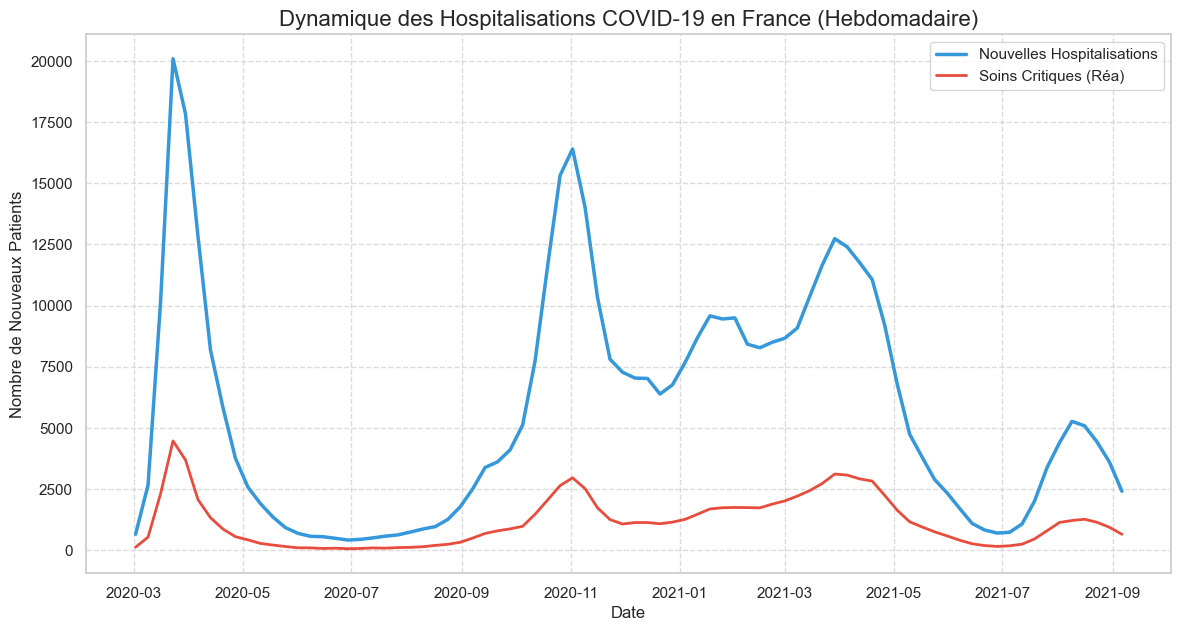

In [7]:
plt.figure(figsize=(14, 7))

# Courbe Hospitalisations
sns.lineplot(data=df_covid, x='Date', y='Hospitalisations', label='Nouvelles Hospitalisations', linewidth=2.5, color='#3498db')
# Courbe Soins Critiques
sns.lineplot(data=df_covid, x='Date', y='SoinsCritiques', label='Soins Critiques (Réa)', linewidth=2, color='#e74c3c')

plt.title("Dynamique des Hospitalisations COVID-19 en France (Hebdomadaire)", fontsize=16)
plt.ylabel("Nombre de Nouveaux Patients")
plt.xlabel("Date")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Commentaire
On distingue clairement **4 vagues majeures** :
1.  **Mars-Avril 2020** : Brutale et rapide.
2.  **Octobre-Novembre 2020** : Le pic le plus élevé en volume d'hospitalisations (> 20 000/semaine).
3.  **Avril 2021** : Une vague plus étalée (plateau élevé), indiquant une saturation longue des services.
4.  **Août 2021** : Une vague estivale plus contenue en absolu mais impactant les congés du personnel.

La corrélation entre les admissions générales et les soins critiques montre une tension constante sur les services de réanimation (environ 20-25% des hospitalisés).

## 3. Analyse Statistique Descriptive

In [9]:
stats = df_covid[['Hospitalisations', 'SoinsCritiques', 'Deces']].describe().round(1)
display(stats)

# Calcul du ratio moy Soins Critiques / Hospitalisations
ratio_rea = (df_covid['SoinsCritiques'].sum() / df_covid['Hospitalisations'].sum()) * 100
print(f"Ratio moyen d'admission en Soins Critiques : {ratio_rea:.1f}%")

,Hospitalisations,SoinsCritiques,Deces
count,80.0,80.0,80.0
mean,5748.5,1171.8,1110.5
std,4739.3,997.1,964.6
min,417.0,60.0,18.0
25%,1331.8,259.5,199.5
50%,4585.5,1024.5,722.5
75%,8783.2,1736.8,1922.5
max,20088.0,4466.0,3760.0


Ratio moyen d'admission en Soins Critiques : 20.4%


## 4. Analyse Régionale : Disparités d'Impact
Comparaison de l'intensité des vagues selon les régions (Taux pour 1000 habitants).

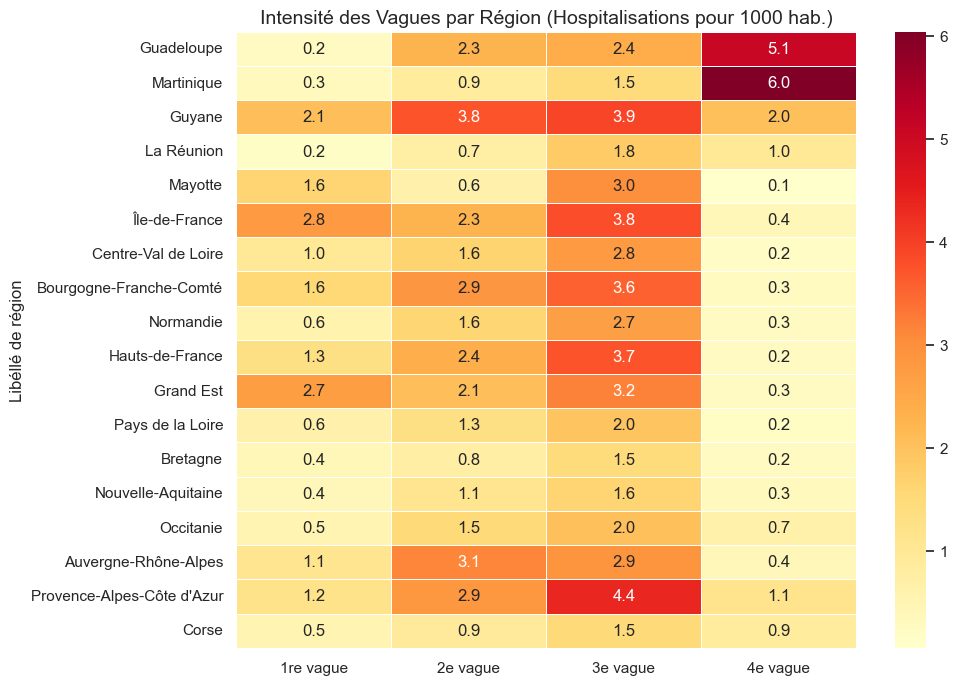

In [11]:
# Nettoyage des colonnes (Espaces)
df_hab.columns = df_hab.columns.str.strip()
# Format Long pour Seaborn
df_hab_long = df_hab.melt(id_vars='Libéllé de région', var_name='Vague', value_name='Taux_1000_Hab')

# Heatmap
plt.figure(figsize=(10, 8))
pivot_hab = df_hab.set_index('Libéllé de région')
sns.heatmap(pivot_hab, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=.5)
plt.title("Intensité des Vagues par Région (Hospitalisations pour 1000 hab.)", fontsize=14)
plt.show()

### Analyse des Disparités
- **Antilles-Guyane** : On observe une explosion lors de la **4e vague** (Martinique : 6.04 pour 1000 hab, Guadeloupe : 5.09), contrairement à la métropole où la 4e vague était plus faible.
- **Île-de-France (IDF)** : Très touchée lors de la 1re vague, mais impact modéré comparativement lors des suivantes.
- **PACA** : Vagues 2 et 3 très marquées.

Cette hétérogénéité impose une gestion **agile et territorialisée** des ressources (transferts de patients, renforts RH inter-régionaux).

## 5. Synthèse et Recommandations
Les données mettent en évidence la nécessité de :
1.  **Anticiper la saturation des Soins Critiques** (environ 25% des flux).
2.  **Moduler les effectifs** : La 2e vague a été la plus volumineuse, nécessitant un rappel massif de personnel.
3.  **Solidarité Territoriale** : La 4e vague "Outre-mer" montre que quand la métropole respire, les DOM peuvent être en crise (et inversement). 